In [2]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('indiaCensus.csv')

In [9]:
for col in df.columns:
  print(col )

District code
State Name
District name
Population
Male
Female
Literate
Male_Literate
Female_Literate
SC
Male_SC
Female_SC
ST
Male_ST
Female_ST
Workers
Male_Workers
Female_Workers
Main_Workers
Marginal_Workers
Non_Workers
Cultivator_Workers
Agricultural_Workers
Household_Workers
Other_Workers
Hindus
Muslims
Christians
Sikhs
Buddhists
Jains
Others_Religions
Religion_Not_Stated
LPG_or_PNG_Households
Housholds_with_Electric_Lighting
Households_with_Internet
Households_with_Computer
Rural_Households
Urban_Households
Households
Below_Primary_Education
Primary_Education
Middle_Education
Secondary_Education
Higher_Education
Graduate_Education
Other_Education
Literate_Education
Illiterate_Education
Total_Education
Age_Group_0_29
Age_Group_30_49
Age_Group_50
Age not stated
Households_with_Bicycle
Households_with_Car_Jeep_Van
Households_with_Radio_Transistor
Households_with_Scooter_Motorcycle_Moped
Households_with_Telephone_Mobile_Phone_Landline_only
Households_with_Telephone_Mobile_Phone_Mobile_

In [10]:
# Check for missing values
print(df.isnull().sum())

District code                    0
State Name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64


In [11]:
# Check for duplicates
print(df.duplicated().sum())

0


In [12]:
# Check for inconsistent data types
print(df.dtypes)

District code                     int64
State Name                       object
District name                    object
Population                        int64
Male                              int64
                                  ...  
Power_Parity_Rs_330000_425000     int64
Power_Parity_Rs_425000_545000     int64
Power_Parity_Rs_330000_545000     int64
Power_Parity_Above_Rs_545000      int64
Total_Power_Parity                int64
Length: 118, dtype: object


In [13]:
# Check for outliers
print(df.describe())

       District code    Population          Male        Female      Literate  \
count     640.000000  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean      320.500000  1.891961e+06  9.738598e+05  9.181011e+05  1.193186e+06   
std       184.896367  1.544380e+06  8.007785e+05  7.449864e+05  1.068583e+06   
min         1.000000  8.004000e+03  4.414000e+03  3.590000e+03  4.436000e+03   
25%       160.750000  8.178610e+05  4.171682e+05  4.017458e+05  4.825982e+05   
50%       320.500000  1.557367e+06  7.986815e+05  7.589200e+05  9.573465e+05   
75%       480.250000  2.583551e+06  1.338604e+06  1.264277e+06  1.602260e+06   
max       640.000000  1.106015e+07  5.865078e+06  5.195070e+06  8.227161e+06   

       Male_Literate  Female_Literate            SC       Male_SC  \
count   6.400000e+02     6.400000e+02  6.400000e+02  6.400000e+02   
mean    6.793182e+05     5.138675e+05  3.146537e+05  1.617739e+05   
std     5.924144e+05     4.801816e+05  3.129818e+05  1.611216e+05   
min

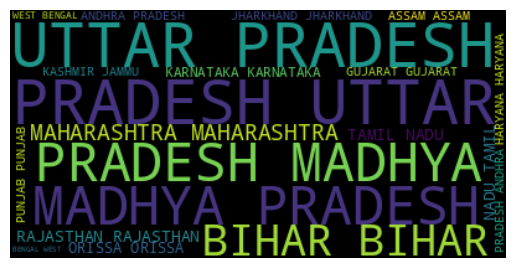

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Advanced Word Chart
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(df['State Name'].astype(str)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


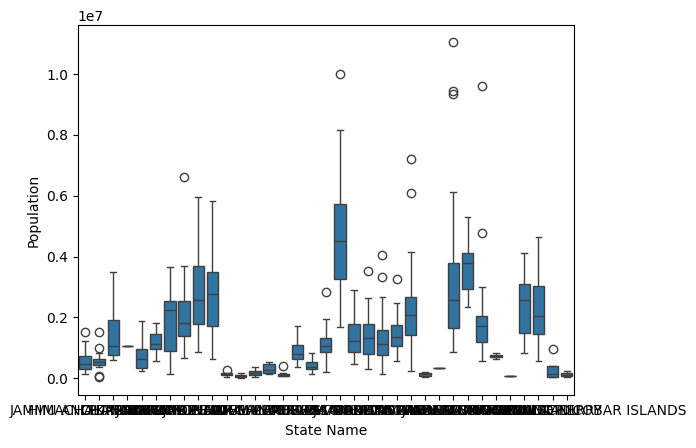

In [19]:
# Box and Whisker Plot
sns.boxplot(x="State Name", y="Population", data=df)
plt.show()

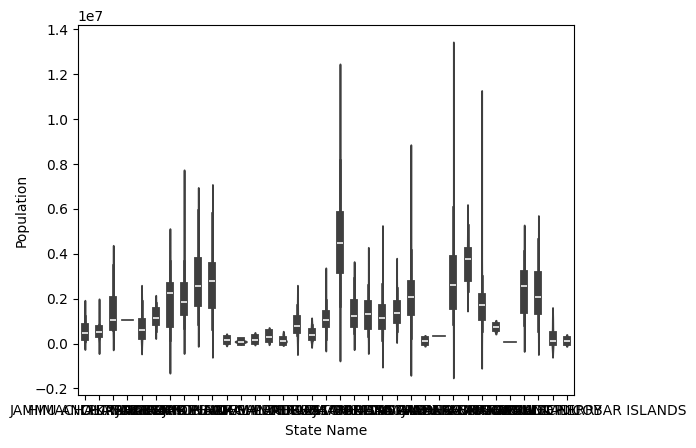

In [21]:
# Violin Plot
sns.violinplot(x="State Name", y="Population", data=df)
plt.show()

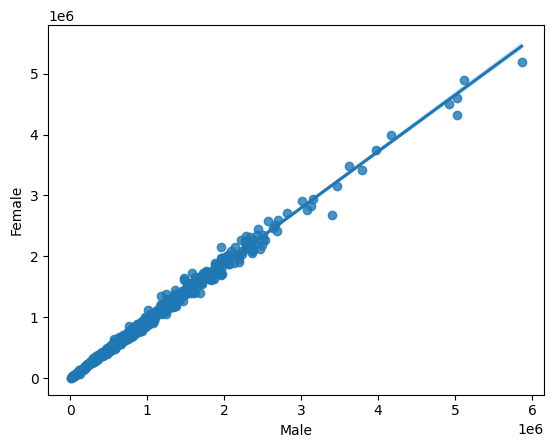

In [22]:
# Linear Regression Plot
sns.regplot(x="Male", y="Female", data=df)
plt.show()

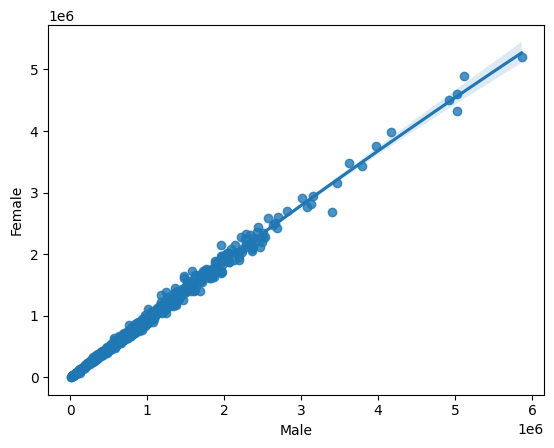

In [23]:
# Non-Linear Regression Plot
sns.regplot(x="Male", y="Female", data=df, order=2)
plt.show()

In [24]:
# 3D Chart
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=df['Male'],
    y=df['Female'],
    z=df['Population'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Population'],
        colorscale='Viridis',
        showscale=True
    )
)])
fig.update_layout(title='3D Scatter Plot')
fig.show()


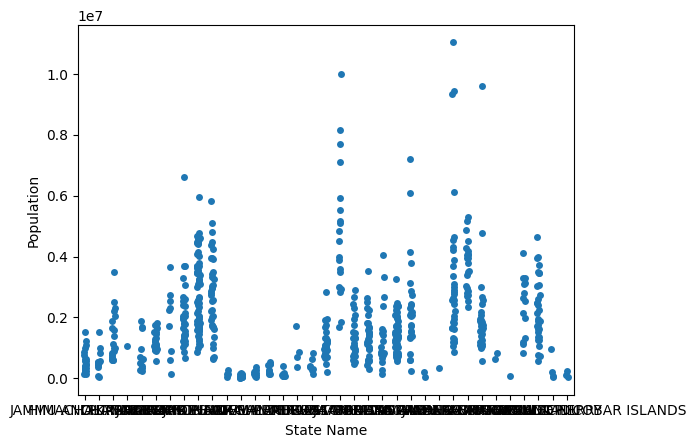

In [25]:
# Jitter Plot
sns.stripplot(x="State Name", y="Population", data=df, jitter=True)
plt.show()

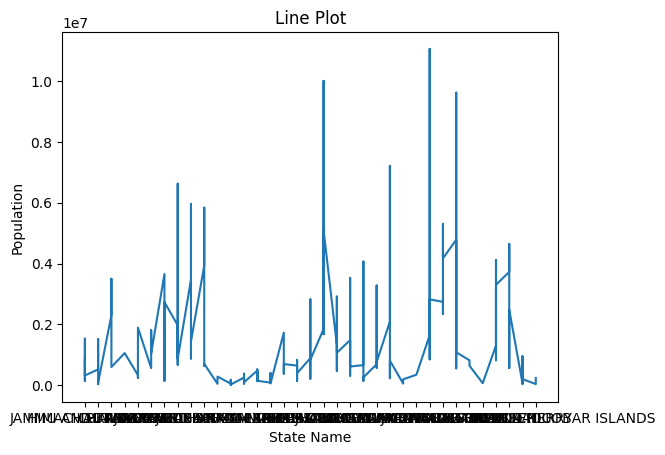

In [26]:
# Line Plot
plt.plot(df['State Name'], df['Population'])
plt.xlabel('State Name')
plt.ylabel('Population')
plt.title('Line Plot')
plt.show()

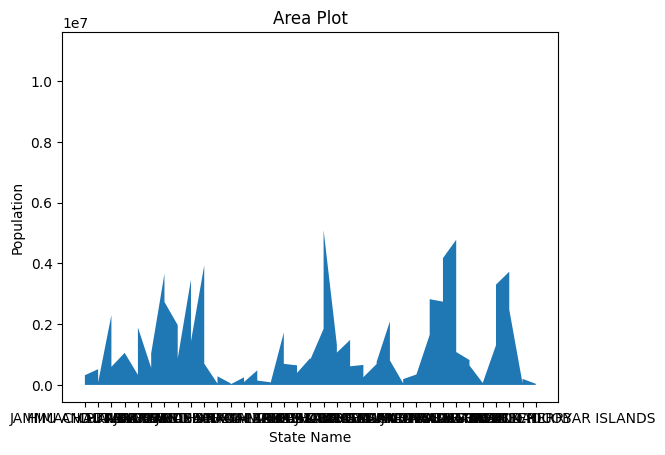

In [27]:
# Area Plot
plt.fill_between(df['State Name'], df['Population'])
plt.xlabel('State Name')
plt.ylabel('Population')
plt.title('Area Plot')
plt.show()

In [28]:
# Waterfall Plot
import plotly.graph_objects as go
fig = go.Figure(go.Waterfall(
    orientation="v",
    measure=["relative", "relative", "total", "relative", "relative", "total"],
    x=["Hindus", "Muslims", "Christians", "Sikhs", "Buddhists", "Jains"],
    textposition="outside",
    text=["+60", "+80", "140", "+100", "+120", "260"],
    y=[60, 80, 140, 100, 120, 260],
    connector={"line":{"color":"rgb(63, 63, 63)"}},
))
fig.update_layout(title="Waterfall Plot")
fig.show()

In [31]:
pip install squarify

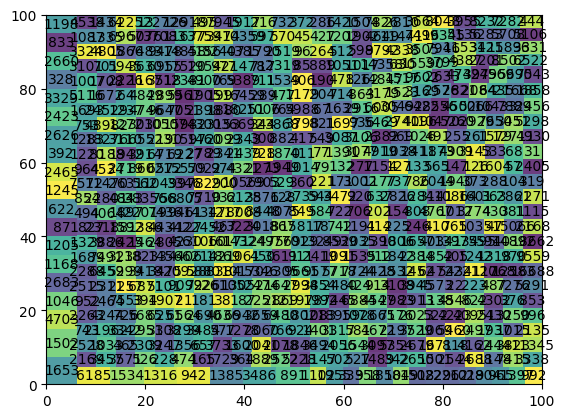

In [32]:
# Treemap
import squarify
squarify.plot(sizes=df['Religion_Not_Stated'].value_counts().values, label=df['Religion_Not_Stated'].value_counts().index, alpha=0.8)
plt.show()

In [33]:
# Funnel Plot
import plotly.graph_objects as go
fig = go.Figure(go.Funnel(
    y = df['Religion_Not_Stated'].value_counts().values,
    x = df['Religion_Not_Stated'].value_counts().index,
    textinfo = "value+percent initial",
    opacity = 0.65,
    marker = {"color": ["deepskyblue", "lightseagreen", "limegreen", "gold", "tomato", "firebrick"], "line": {"color": "black", "width": 0.5}},
    connector = {"line": {"color": "black", "width": 0.5}},
))
fig.update_layout(title="Funnel Plot")
fig.show()


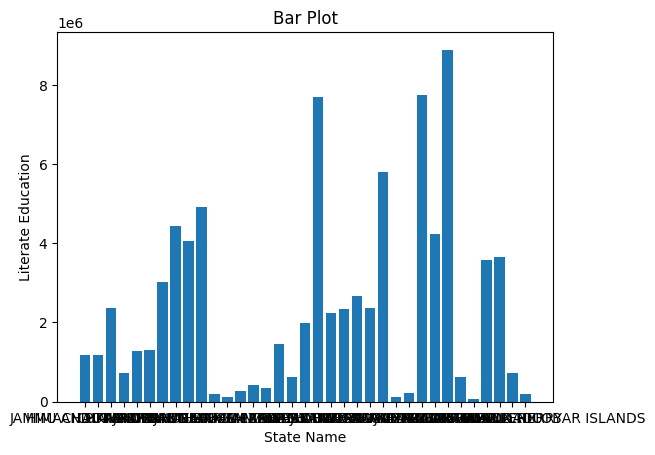

In [34]:
# Bar Plot for Education
plt.bar(df['State Name'], df['Literate_Education'])
plt.xlabel('State Name')
plt.ylabel('Literate Education')
plt.title('Bar Plot')
plt.show()

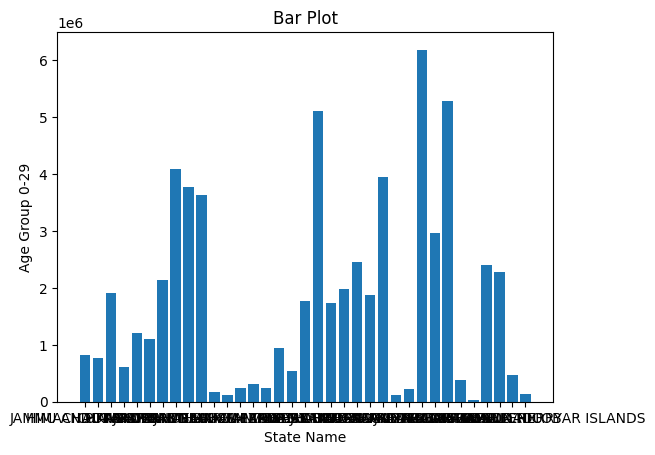

In [35]:
# Bar Plot for Age Group
plt.bar(df['State Name'], df['Age_Group_0_29'])
plt.xlabel('State Name')
plt.ylabel('Age Group 0-29')
plt.title('Bar Plot')
plt.show()

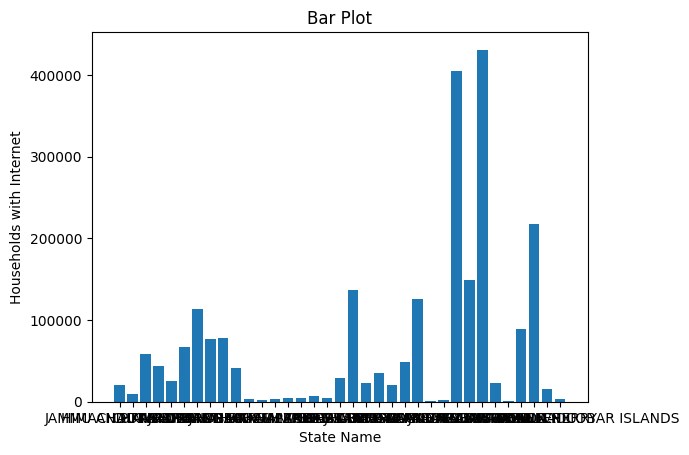

In [39]:

# Bar Plot for Households with Internet
plt.bar(df['State Name'], df['Households_with_Internet'])
plt.xlabel('State Name')
plt.ylabel('Households with Internet')
plt.title('Bar Plot')
plt.show()